<a href="https://colab.research.google.com/github/FazilShah/Machine-Learning/blob/master/Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
data = np.loadtxt('logistic data.txt', delimiter = ',')
x1 = data[:,0]
x2 = data[:,1]
y = data[:,2]

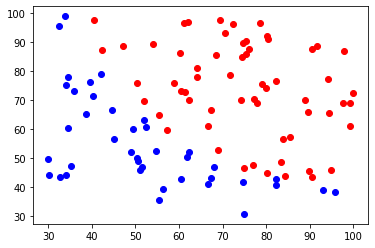

In [ ]:
for i in range(len(x1)):
  if y[i] == 1:
    plt.scatter(x1[i], x2[i], c = 'r')
  else:
    plt.scatter(x1[i], x2[i], c = 'b')
plt.show()


In [ ]:
def sigmoid(th0, th1, th2, x1, x2):
  z= th0 + (th1*x1) + (th2*x2)
  return 1/(1+math.exp(-z))

In [ ]:
def step_gradient(theta0, theta1, theta2, x1, x2, y, alpha):
  new_theta0 = theta0
  new_theta1 = theta1
  new_theta2 = theta2
  gradient0 = 0
  gradient1 = 0
  gradient2 = 0
  mean1 = np.mean(x1)
  mean2 = np.mean(x2)
  for i in range(len(x1)):
    x12 = (x1[i]- mean1)/(np.std(x1))
    x22 = (x2[i]- mean2)/(np.std(x2))
    gradient0 += sigmoid(new_theta0, new_theta1, new_theta2, x12, x22) - y[i]
    gradient1 += (sigmoid(new_theta0, new_theta1, new_theta2, x12, x22) - y[i])*x12
    gradient2 += (sigmoid(new_theta0, new_theta1, new_theta2, x12, x22) - y[i])*x22

  new_theta0 = new_theta0 - ((alpha*gradient0)/100)
  new_theta1 = new_theta1 - ((alpha*gradient1)/100)
  new_theta2 = new_theta2 - ((alpha*gradient2)/100)

  return new_theta0, new_theta1, new_theta2



In [ ]:
def gradient_descent(theta0, theta1, theta2, x1, x2, y, alpha, iterations):
  costarray = []
  for i in range(iterations):
    theta0, theta1, theta2 = step_gradient(theta0, theta1, theta2, x1, x2, y, alpha)
    gr = cost(theta0, theta1,theta2,x1,x2)
  return theta0, theta1, theta2

In [ ]:
gradient_descent(0,0,0, x1,x2,y,0.1,1000)

(1.271307404855522, 3.048598912865148, 2.8128542788905295)

In [ ]:
def sigmoid2(z):
  return 1/(1+np.exp(-z))

In [ ]:
def predict(x1,x2):
  a = (x1-65.64)/19.36
  b = (x2-66.22)/18.48
  prob = sigmoid2(1.27 + (3.04*a) + (2.81*b))
  if prob >= 0.5:
    return 1
  else:
    return 0


In [ ]:
def accuracy_check(x1, x2,y):
  count = 0
  for i in range(len(y)):
    if predict(x1[i],x2[i]) == y[i]:
      count+=1
  return count

In [ ]:
accuracy_check(x1,x2,y)

89

In [ ]:
predict(35,80)

0.1906327184771683


0

In [ ]:
def cost(th0, th1, th2, x1, x2):
  mean1 = np.mean(x1)
  mean2 = np.mean(x2)

  initial_cost = 0
  for i in range(len(x1)):
    x12 = (x1[i]- mean1)/(np.std(x1))
    x22 = (x2[i]- mean2)/(np.std(x2))
    initial_cost += (y[i]*np.log(sigmoid(th0, th1, th2, x12, x22))) + ((1-y[i])*np.log(1-sigmoid(th0, th1, th2, x12, x22)))
  return -(initial_cost/len(x1))

